<a href="https://colab.research.google.com/github/KTUYTS/cs441-19-sp2023-data-visualization/blob/main/cs441_sp2023_tuyts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import io
my_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (1).csv


In [ ]:
my_data = pd.read_csv('train.csv')

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(my_data.head())
my_data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="whitegrid")

data = [train_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


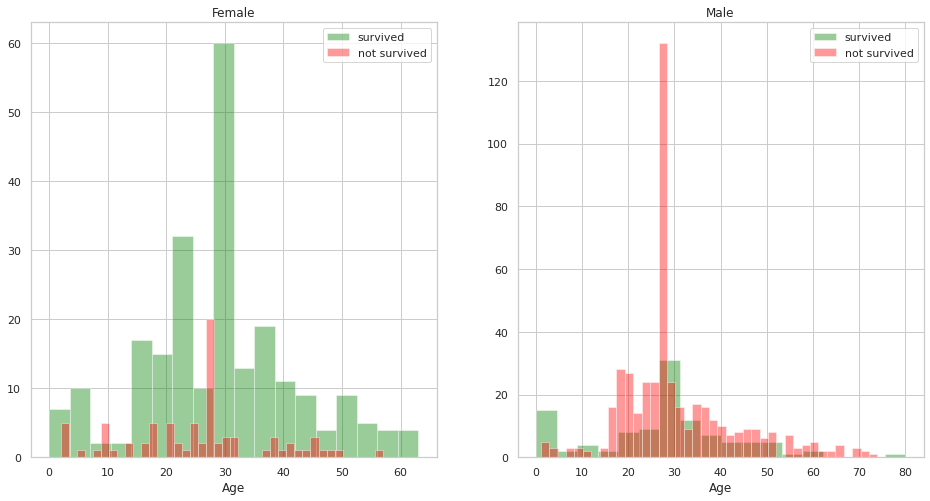

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

<AxesSubplot:xlabel='Fare', ylabel='Count'>

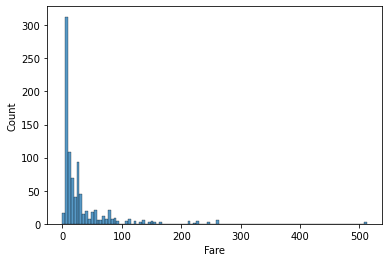

In [ ]:
sns.histplot(data=my_data, x="Fare")
#sns.kdeplot(data=my_data, x="Fare")

Density Plot of Age for Surviving Population and Deceased Population


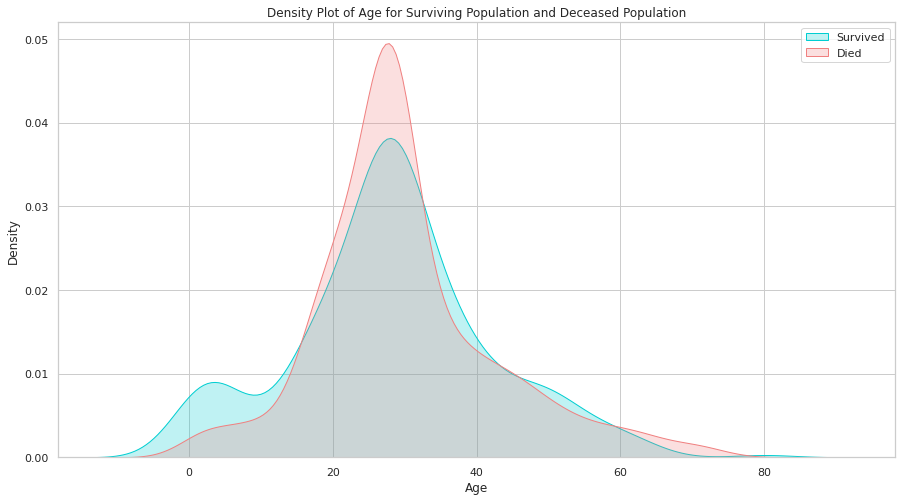

In [ ]:
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()


# PetFinder.my-Adoption-Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/train.csv")


We'll be looking at individual features.
Target class ( AdoptionSpeed )

We'll look at class distribution and investigate for imbalance distribution.
So there are total 5 target class i.e, 0,1,2,3,4 which means-

1 - Pet was adopted on the same day as it was listed.

2 - Pet was adopted between 1 and 7 days (1st week) after being listed.

3 - Pet was adopted between 8 and 30 days (1st month) after being listed.

4 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

5 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days)

We'll look at distribution of cat and dog and which pet is most likely to get adopted sooner with the help of plot below. Here I'm going to use stacked bar plot to have good idea from one plot alone.

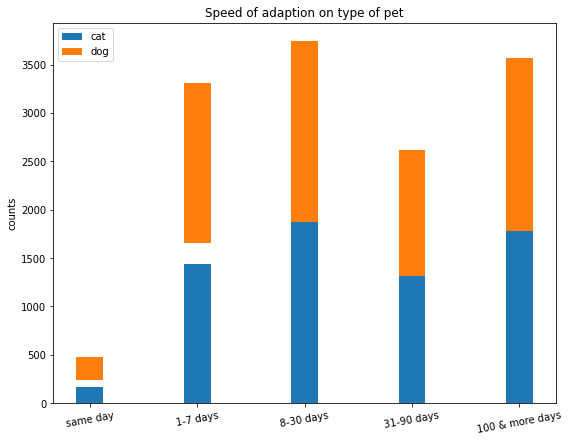

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
dog_ = []
cat_ = []

#seprate cat and dog
dog = data[data["Type"]==1].AdoptionSpeed.value_counts()
cat = data[data["Type"]==2].AdoptionSpeed.value_counts()

#appending to varibles
for i in range(len(dog)):
    #first dog then cat
    dog_.append(dog[i])
    cat_.append(cat[i])

#some veriabels
total_ft = len(dog_)
indx = np.arange(total_ft)
width = 0.25
    
#plotting
plt.figure(figsize=(9,7))
p1 = plt.bar(indx, dog_, width)
p2 = plt.bar(indx, cat_, width, bottom=cat_)

plt.ylabel("counts")
plt.title("Speed of adaption on type of pet")
plt.xticks(indx, ["same day","1-7 days","8-30 days","31-90 days","100 & more days"], rotation=10)
plt.legend((p1[0], p2[0]), ('cat', 'dog'))
plt.show()

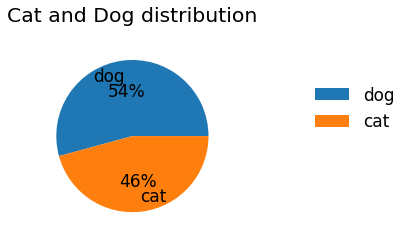

In [ ]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(3,4))
plt.rcParams['font.size']=17

#percent count
labels = ["dog","cat"]
percentages = [(data[data["Type"]==1].AdoptionSpeed.shape[0]*100)/data.shape[0],
               (data[data["Type"]==2].AdoptionSpeed.shape[0]*100)/data.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.6,labeldistance=0.8)
ax.axis('equal')
ax.set_title("Cat and Dog distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
#plt.show()

In [ ]:
plt.show()

Conclusion:

From above It's clear that people are not biased towards any of pets while adopting them. Speed of adaption for both pet is almost same. Since dog pet is 8 percent more in population comparing to cat so we can conlcude one more thing is that dog are slighlty more likely to get listed for adoption comparing to cats.

In [ ]:
!pip install pytrends --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***MIR-TERM ***

**Purposes**

1. Presenting the price of gold to mom through the lesson
2. Practice manual processing to discover how data is handled
3. Evaluate advantages and disadvantages. State the actual difficulties that I encountered through this problem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


**About DOJI**

DOJI gold makes a mark on the market when mastering the source of exploitation, production and distribution. The featured product at DOJI is blistered gold with many designs, suitable for many customer segments.

In [ ]:
url = "https://trangsuc.doji.vn/bang-gia-vang"

**Data collection**

In [ ]:
tables = pd.read_html(url)

**Data discovery and processing**

In [ ]:
doji = tables[0]

In [ ]:
doji

,Giá vàng trong nước,Mua,Bán
0,DOJI HN lẻ,66400000,67000000
1,DOJI HCM lẻ,66400000,67000000
2,DOJI HCM buôn,66400000,67000000
3,Vàng 24k (nghìn/chỉ),5505000,5610000
4,Vàng 18k (nghìn/chỉ),3915000,5565000
5,Vàng 14k (nghìn/chỉ),2990000,4013000
6,Nhẫn Tròn 9999 Hưng Thịnh Vượng,5540000,5635000
7,Âu Vàng Phúc Long,66400000,67000000


In [ ]:
ori_name = doji.loc[:,["Giá vàng trong nước"]]
ori_buy = doji.loc[:,["Mua"]]
ori_sell = doji.loc[:,["Bán"]]

In [ ]:
ori_name

,Giá vàng trong nước
0,DOJI HN lẻ
1,DOJI HCM lẻ
2,DOJI HCM buôn
3,Vàng 24k (nghìn/chỉ)
4,Vàng 18k (nghìn/chỉ)
5,Vàng 14k (nghìn/chỉ)
6,Nhẫn Tròn 9999 Hưng Thịnh Vượng
7,Âu Vàng Phúc Long


In [ ]:
ori_buy

,Mua
0,66400000
1,66400000
2,66400000
3,5505000
4,3915000
5,2990000
6,5540000
7,66400000


In [ ]:
ori_sell 

,Bán
0,67000000
1,67000000
2,67000000
3,5610000
4,5565000
5,4013000
6,5635000
7,67000000


In [ ]:
arr_name = ori_name.to_numpy()
arr_buy = ori_buy.to_numpy()
arr_sell = ori_sell.to_numpy()

In [ ]:
arr_name

array([['DOJI HN lẻ'],
       ['DOJI HCM lẻ'],
       ['DOJI HCM buôn'],
       ['Vàng 24k (nghìn/chỉ)'],
       ['Vàng 18k (nghìn/chỉ)'],
       ['Vàng 14k (nghìn/chỉ)'],
       ['Nhẫn Tròn 9999 Hưng Thịnh Vượng'],
       ['Âu Vàng Phúc Long']], dtype=object)

In [ ]:
arr_buy

array([[66400000],
       [66400000],
       [66400000],
       [ 5505000],
       [ 3915000],
       [ 2990000],
       [ 5540000],
       [66400000]])

In [ ]:
arr_sell

array([[67000000],
       [67000000],
       [67000000],
       [ 5610000],
       [ 5565000],
       [ 4013000],
       [ 5635000],
       [67000000]])

In [ ]:
name = arr_name.reshape(-1)
buy = arr_buy.reshape(-1)
sell = arr_sell.reshape(-1)

In [ ]:
name

array(['DOJI HN lẻ', 'DOJI HCM lẻ', 'DOJI HCM buôn',
       'Vàng 24k (nghìn/chỉ)', 'Vàng 18k (nghìn/chỉ)',
       'Vàng 14k (nghìn/chỉ)', 'Nhẫn Tròn 9999 Hưng Thịnh Vượng',
       'Âu Vàng Phúc Long'], dtype=object)

In [ ]:
buy

array([66400000, 66400000, 66400000,  5505000,  3915000,  2990000,
        5540000, 66400000])

In [ ]:
sell

array([67000000, 67000000, 67000000,  5610000,  5565000,  4013000,
        5635000, 67000000])

**Show data results**

Text(0.5, 1.0, 'Giá Mua Vàng Hôm Nay Tại Doji')

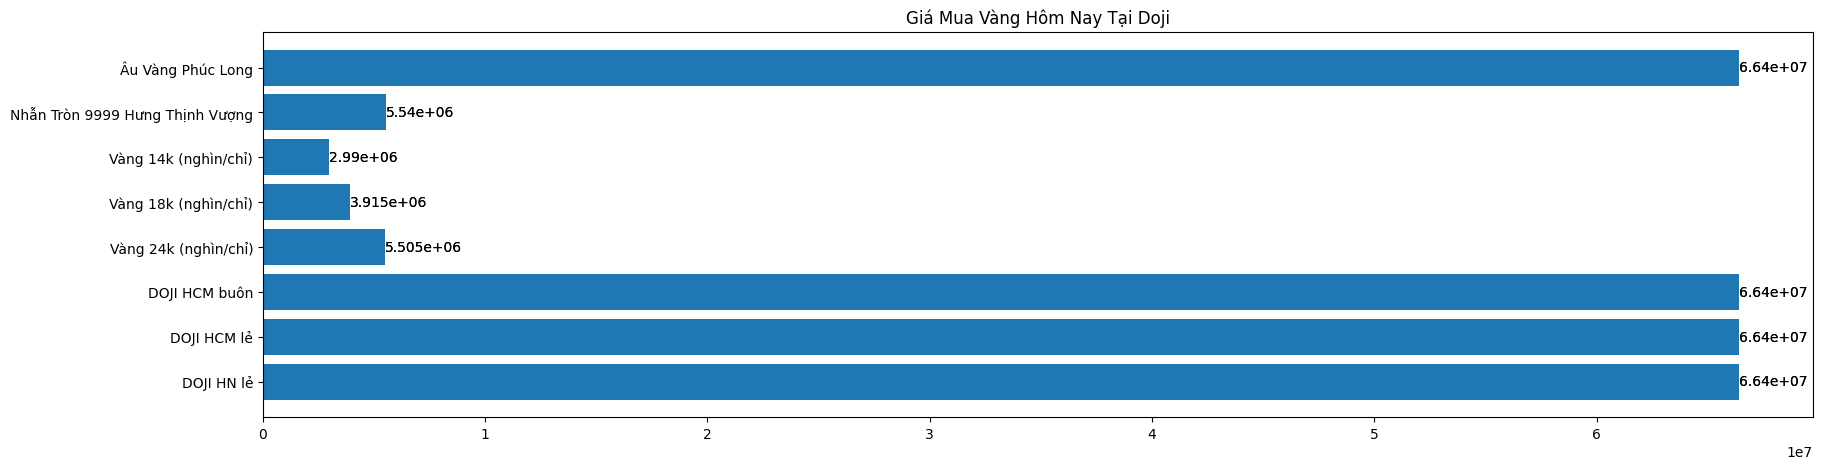

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.barh(name, buy)

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Giá Mua Vàng Hôm Nay Tại Doji")

Text(0.5, 1.0, 'Giá Bán Vàng Hôm Nay Tại Doji')

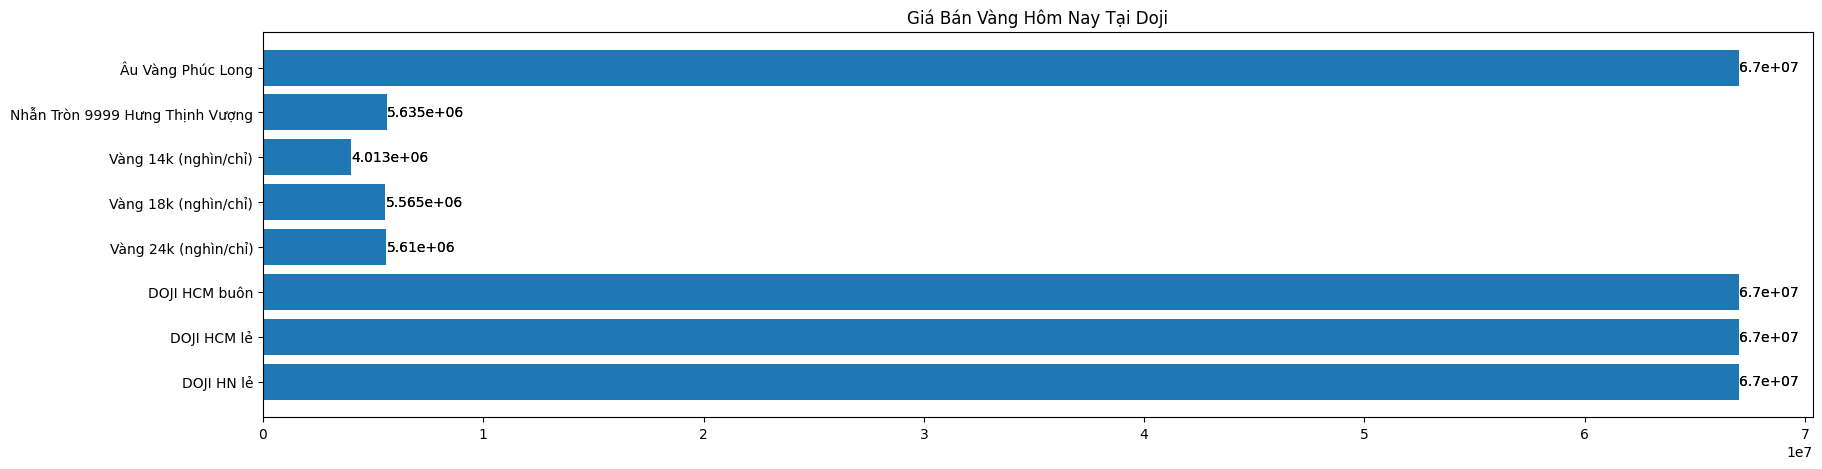

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.barh(name, sell)

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)


plt.title("Giá Bán Vàng Hôm Nay Tại Doji")

**Problems need to solve**
1. Did not meet the desired result is a specific show of VND value for each product unit
2. Need a variety of data, not necessarily get data from 1 website
3. Try to automate the procedure
4. Respecting the assets of businesses, web data is also included in that set


Folium
/content/dublin.csv

In [ ]:
import pandas as pd
import folium

In [ ]:
location = "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/2dec86ed-76ed-47a3-ae28-646db5c5b965/download/dublin.csv"
bike_station_locations = pd.read_csv(location)

In [ ]:
bike_station_locations 

,Number,Name,Address,Latitude,Longitude
0,42,SMITHFIELD NORTH,Smithfield North,53.349562,-6.278198
1,30,PARNELL SQUARE NORTH,Parnell Square North,53.353462,-6.265305
2,54,CLONMEL STREET,Clonmel Street,53.336021,-6.262980
3,108,AVONDALE ROAD,Avondale Road,53.359405,-6.276142
4,56,MOUNT STREET LOWER,Mount Street Lower,53.337960,-6.241530
...,...,...,...,...,...
105,39,WILTON TERRACE,Wilton Terrace,53.332383,-6.252717
106,83,EMMET ROAD,Emmet Road,53.340714,-6.308191
107,92,HEUSTON BRIDGE (NORTH),Heuston Bridge (North),53.347802,-6.292432
108,21,LEINSTER STREET SOUTH,Leinster Street South,53.342180,-6.254485


In [ ]:
bike_station_locations = bike_station_locations[["Latitude", "Longitude", "Name"]]

In [ ]:
bike_station_locations_random = bike_station_locations.sample(10)

In [ ]:
bike_station_locations_random

,Latitude,Longitude,Name
6,53.334123,-6.265436,GRANTHAM STREET
103,53.354663,-6.278681,GRANGEGORMAN LOWER (SOUTH)
97,53.339629,-6.243778,GRATTAN STREET
105,53.332383,-6.252717,WILTON TERRACE
43,53.347932,-6.240928,GUILD STREET
26,53.333653,-6.248345,WILTON TERRACE (PARK)
61,53.342296,-6.287661,MARKET STREET SOUTH
16,53.358930,-6.280337,RATHDOWN ROAD
30,53.341833,-6.231291,SOUTH DOCK ROAD
85,53.355473,-6.264423,HARDWICKE STREET


In [ ]:
map = folium.Map(location=[bike_station_locations_random.Latitude.mean(), bike_station_locations_random.Longitude.mean()], zoom_start=14, control_scale=True)

In [ ]:
for index, location_info in bike_station_locations_random.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(map)

In [12]:
#map

https://www.accuweather.com/

In [ ]:
https://www.accuweather.com/

In [19]:
# if(!require(pacman)){
#   install.packages("pacman")
# }

# pacman::p_load(reticulate)

In [ ]:
!pip install pycountry

In [22]:

## Import required modules 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

In [23]:
## World population 1800-2050
###################################################################
## Global population trends 
# help(pd.read_html)
scrape = pd.read_html('https://en.wikipedia.org/wiki/World_population', header=0)

## Transpose the data as it is horizonta;
population1 = scrape[0].transpose()

## Drop the column
population1 = population1.drop(["Population"])

## View the type and index of population data
type(population1)

pandas.core.frame.DataFrame

In [24]:
population1.index

## Rename column

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [25]:
population1.columns = ["year", "years_passed"]

population1['population'] = list(range(1, 11))

## Convert year column to numeric
population1['year'] = population1["year"].astype(float)
population1["population"] = population1["population"].astype(float)

population1.head()

,year,years_passed,population
1,1804.0,"200,000+",1.0
2,1930.0,126,2.0
3,1960.0,30,3.0
4,1974.0,14,4.0
5,1987.0,13,5.0


In [26]:
##################################################################
## Scrap world population by continent 
population = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")

## Get the proper table 
population = population[1]

## View the columns 
population.columns

## drop the top row

MultiIndex([(                                        'Rank', ...),
            (                        'Country / Dependency', ...),
            (                                  'Population', ...),
            (                                  'Population', ...),
            (                                        'Date', ...),
            ('Source (official or from the United Nations)', ...),
            (                                       'Notes', ...)],
           )

In [27]:
population = population.drop(index=0, axis='index')

## Reset the row index to start at 0
population = population.reset_index()
population = population.drop("index", axis = "columns")

## Rename the column

<ipython-input-27-82c0c07c6668>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  population = population.drop("index", axis = "columns")


In [28]:
population = population.rename(columns = {"Country / Dependency": "Country"})
population.head()

## select a few columns

Rank        Country  Population                        Date  \
  Rank        Country     Numbers % of the world         Date   
0    1          China  1411750000            NaN  31 Dec 2022   
1    2          India  1392329000            NaN   1 Mar 2023   
2    3  United States   334856000            NaN   7 Jun 2023   
3    4      Indonesia   277749853            NaN  31 Dec 2022   
4    5       Pakistan   220425254            NaN   1 Jul 2020   

  Source (official or from the United Nations) Notes  
  Source (official or from the United Nations) Notes  
0                         Official estimate[4]   [b]  
1                       Official projection[5]   [c]  
2                 National population clock[7]   [d]  
3                         Official estimate[8]   NaN  
4                       Official projection[9]   [e]

In [29]:
population = population[['Rank','Country', 'Population']]

## Rename the columns
population.columns = [['rank', 'country', 'population', 'world_perc']]
population.columns = [x[0] for x in population.columns]
population.head()

,rank,country,population,world_perc
0,1,China,1411750000,NaN
1,2,India,1392329000,NaN
2,3,United States,334856000,NaN
3,4,Indonesia,277749853,NaN
4,5,Pakistan,220425254,NaN


In [30]:
## Insert country code 
def country_code(country):
    try:
        return(pc.countries.get(name = country).alpha_3)
    except:
        return("NA")
    
population['code'] = [country_code(x) for x in population['country']]
population.head()

## Create a continent column ----
## get a list of codes 

,rank,country,population,world_perc,code
0,1,China,1411750000,NaN,CHN
1,2,India,1392329000,NaN,IND
2,3,United States,334856000,NaN,USA
3,4,Indonesia,277749853,NaN,IDN
4,5,Pakistan,220425254,NaN,PAK


In [31]:
codes = pd.read_html('https://cloford.com/resources/codes/index.htm')[3]
codes = codes.drop('Note', axis = 'columns')
codes = codes.rename(columns = {"ISO (2)": "ISO2", "ISO (3)": "code", "ISO (No)": "ISO_No"})

## preview codes 
codes.head()

,Continent,Region,Country,Capital,FIPS,ISO2,code,ISO_No,Internet
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,4.0,AF
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,8.0,AL
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,12.0,DZ
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,16.0,AS
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,20.0,AD


In [32]:
## Join the two dataframes ----
final_data = pd.merge(population, codes, on = "code")
final_data.head()

,rank,country,population,world_perc,code,Continent,Region,Country,Capital,FIPS,ISO2,ISO_No,Internet
0,1,China,1411750000,NaN,CHN,Asia,East Asia,China,Beijing,CH,CN,156.0,CN
1,2,India,1392329000,NaN,IND,Asia,South Asia,India,New Delhi,IN,IN,356.0,IN
2,3,United States,334856000,NaN,USA,Americas,North America,United States,"Washington, DC",US,US,840.0,US
3,4,Indonesia,277749853,NaN,IDN,Asia,South East Asia,Indonesia,Jakarta,ID,ID,360.0,ID
4,5,Pakistan,220425254,NaN,PAK,Asia,South Asia,Pakistan,Islamabad,PK,PK,586.0,PK


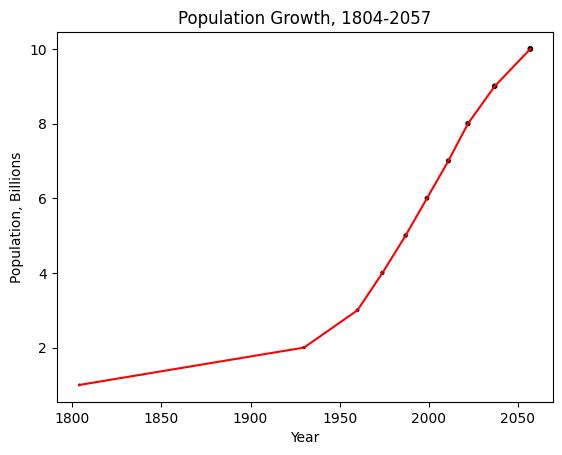

In [33]:
## Population trends, 1800-2050
## Visualise world population 
plt.plot(population1['year'], population1['population'], c = "red")

## Add points to the plot 
plt.scatter(population1['year'], population1['population'], c = "black", s= population1["population"])

plt.xlabel("Year")

plt.ylabel("Population, Billions")

plt.title("Population Growth, 1804-2057")

plt.show()

In [34]:
final_data.loc[final_data['population'].idxmax()]

rank                   1
country            China
population    1411750000
world_perc           NaN
code                 CHN
Continent           Asia
Region         East Asia
Country            China
Capital          Beijing
FIPS                  CH
ISO2                  CN
ISO_No             156.0
Internet              CN
Name: 0, dtype: object

In [36]:
final_data.loc[final_data['population'].idxmin()]

rank                –
country          Niue
population       1549
world_perc        NaN
code              NIU
Continent     Oceania
Region        Pacific
Country          Niue
Capital         Alofi
FIPS               NE
ISO2               NU
ISO_No          570.0
Internet           NU
Name: 171, dtype: object

In [37]:
final_data.groupby('Continent').sum()['population'].sort_values()

<ipython-input-37-05ca85e84f30>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_data.groupby('Continent').sum()['population'].sort_values()


Continent
Oceania       43299548
Europe       558911062
Americas     990856326
Africa      1143887557
Asia        4313021778
Name: population, dtype: int64

In [38]:
final_data.groupby('Region').sum()['population'].sort_values()

<ipython-input-38-1e4d837e8ed2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_data.groupby('Region').sum()['population'].sort_values()


Region
Northern Asia           3500878
Northern Europe        27910830
Indian Ocean           29043312
South East Europe      30866244
Central Europe         33079291
West Indies            38764701
Pacific                43299548
Central Africa         54505937
South West Europe      58700433
Southern Europe        59368872
Central Asia           79172174
Eastern Europe         94170607
Southern Africa       171312094
Central America       178735460
Eastern Africa        217897638
Northern Africa       251923194
Western Europe        254814785
South West Asia       261969847
North America         374822391
South America         398533774
Western Africa        419205382
South East Asia       564149393
East Asia            1536250000
South Asia           1867979486
Name: population, dtype: int64

<ipython-input-39-0a999c6bf869>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_data.groupby('Continent').sum()['population'].sort_values().plot()


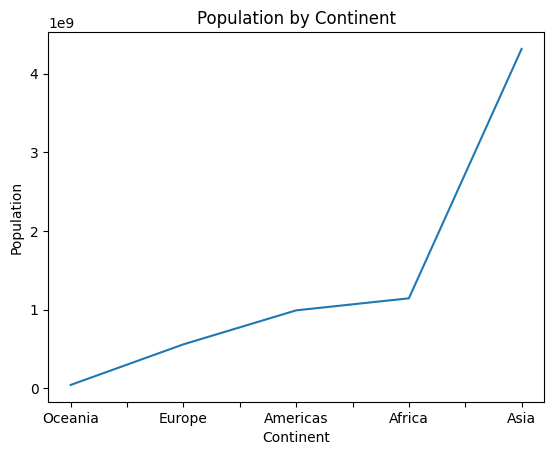

In [39]:
## Plot sorted population by continent
final_data.groupby('Continent').sum()['population'].sort_values().plot()
plt.style.use("tableau-colorblind10")
plt.xlabel("Continent")
plt.ylabel("Population")
plt.title("Population by Continent")
plt.show()

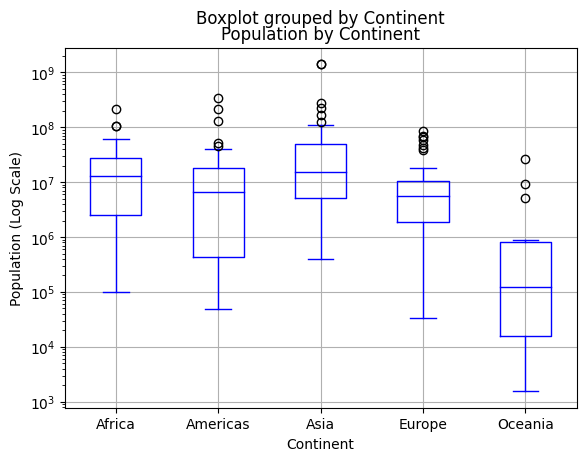

In [40]:
## Box plot of population by continent
final_data.boxplot(column="population", by='Continent', color = 'blue')
plt.style.use("tableau-colorblind10")
plt.xlabel("Continent")
plt.ylabel("Population (Log Scale)")
plt.yscale('log')
plt.title("Population by Continent")
plt.show()

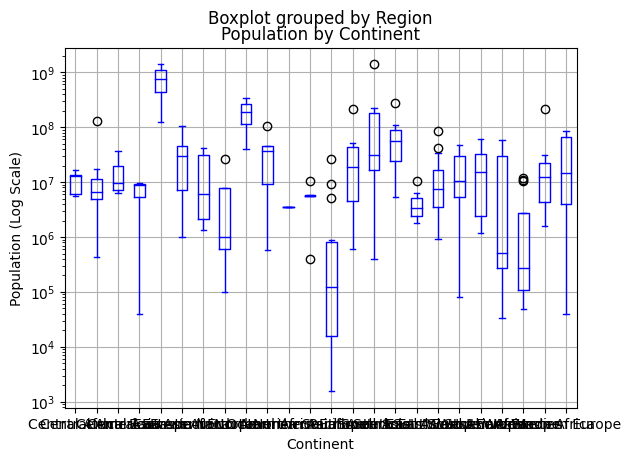

In [41]:
## Population by regions
final_data.boxplot(column="population", by=['Region'], color = 'blue')
plt.style.use("tableau-colorblind10")
plt.yscale('log')
plt.xlabel("Continent")
plt.ylabel("Population (Log Scale)")
plt.title("Population by Continent")
plt.show()